# Réduction de dimension - ACP

In [45]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

Porportion de variance expliquée
  Composante 0 : 58.83%
  Composante 1 : 13.19%
  Composante 2 : 11.15%
  Composante 3 : 7.17%
  Composante 4 : 5.48%
  Composante 5 : 2.59%
  Composante 6 : 1.58%
  Composante 7 : 0.01%
  Composante 8 : 0.00%
  Composante 9 : 0.00%


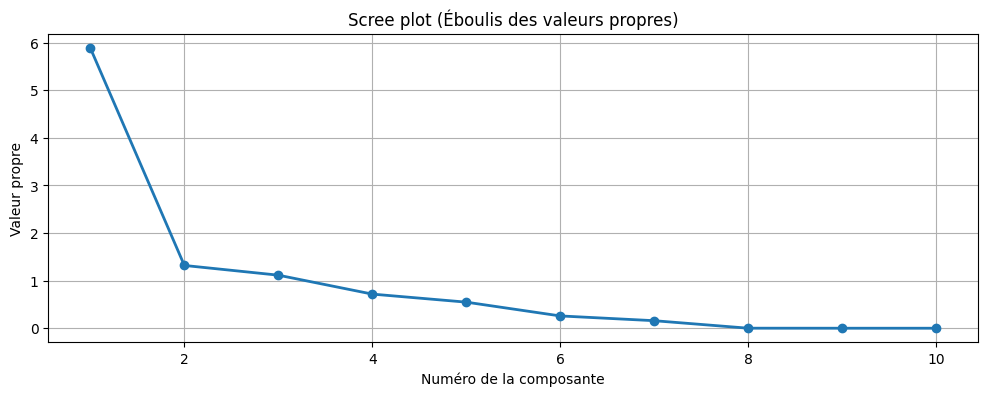

Les pays présentant potentiellement un bais sont:
  Jamaica
  Venezuela
  Benin
  Myanmar
  Liberia
  India
  Bangladesh
  Comoros
  Yemen
  Eswatini
  Botswana
  Lesotho
  Lebanon
  Afghanistan


In [46]:
raw_data = pd.read_csv("./data/acp/WHR2024.csv")

# On retire les lignes où certaines valeurs sont manquantes
raw_data = raw_data.dropna(axis=0, how="any")

# On retire la première colonne (nom de pays = label != catégorie)
data = raw_data.iloc[:,1:]

# Données centrées réduites
scaler = sk.preprocessing.StandardScaler()
data = scaler.fit_transform(data)

# Décomposition ACP des données
acp = sk.decomposition.PCA(svd_solver="full")
pca = acp.fit(data)
n,p = data.shape

# Affichage des informations de l'ACP

eigval = (n-1)/n*pca.explained_variance_

print('Porportion de variance expliquée')
for i, value in enumerate(pca.explained_variance_ratio_):
    print(f"  Composante {i} : {value*100:.2f}%")

# Affichage du graphique des valeurs propres des composantes
plt.figure(figsize=(12,4))
plt.plot(range(1, p+1), eigval, 'o-', linewidth=2)
plt.xlabel("Numéro de la composante")
plt.ylabel("Valeur propre")
plt.title("Scree plot (Éboulis des valeurs propres)")
plt.grid(True)
plt.show()

# Analyse pour savoir si certains pays peuvent présenter un biais

ee = sk.covariance.EllipticEnvelope()

result = ee.fit_predict(data)
outliers = [i for i, x in enumerate(result) if x == -1]
outliers_names = [raw_data.iat[i, 0] for i in outliers]

print("Les pays présentant potentiellement un bais sont:\n ", "\n  ".join(outliers_names))

Porportion de variance expliquée
  Composante 0 : 58.16%
  Composante 1 : 14.59%
  Composante 2 : 10.48%
  Composante 3 : 7.35%
  Composante 4 : 5.10%
  Composante 5 : 2.53%
  Composante 6 : 1.79%
  Composante 7 : 0.01%
  Composante 8 : 0.00%
  Composante 9 : 0.00%


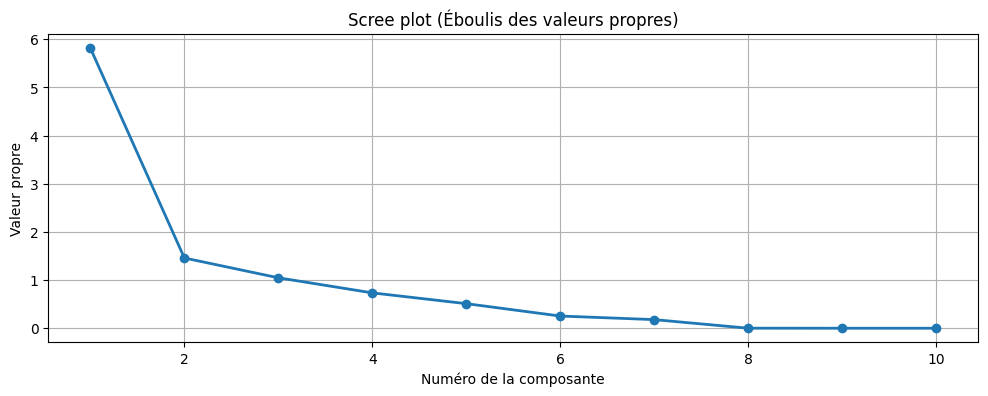

In [47]:
raw_data = pd.read_csv("./data/acp/WHR2024.csv")

# On retire les lignes où certaines valeurs sont manquantes
raw_data = raw_data.dropna(axis=0, how="any")

# On retire la première colonne (nom de pays = label != catégorie)
data = raw_data.iloc[:,1:]

# On retire les outliers
data = data.drop(outliers, axis=0)

# Données centrées réduites
scaler = sk.preprocessing.StandardScaler()
data = scaler.fit_transform(data)

# Décomposition ACP des données
acp = sk.decomposition.PCA(svd_solver="full")
pca = acp.fit(data)
n,p = data.shape

# Affichage des informations de l'ACP


eigval = (n-1)/n*pca.explained_variance_

print('Porportion de variance expliquée')
for i, value in enumerate(pca.explained_variance_ratio_):
    print(f"  Composante {i} : {value*100:.2f}%")

# Affichage du graphique des valeurs propres des composantes
plt.figure(figsize=(12,4))
plt.plot(range(1, p+1), eigval, 'o-', linewidth=2)
plt.xlabel("Numéro de la composante")
plt.ylabel("Valeur propre")
plt.title("Scree plot (Éboulis des valeurs propres)")
plt.grid(True)
plt.show()